In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [2]:
learning_rate = 0.01
epochs = 400

In [3]:
n_samples = 60
train_x = np.linspace(0, 20, n_samples)
train_y = 3 * train_x + 4 * np.random.randn(n_samples)

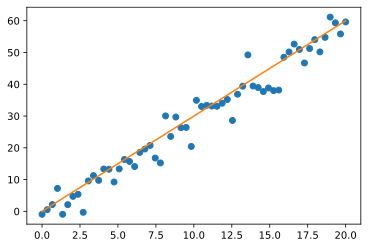

In [4]:
plt.plot(train_x, train_y, 'o')
plt.plot(train_x, 3 * train_x)
plt.show()

In [5]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name="weights")
B = tf.Variable(np.random.randn(), name="bias")

In [6]:
pred = X * W + B

cost = tf.reduce_sum((pred - Y) ** 2) / (2 * n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
init = tf.global_variables_initializer()

epoch: 0000 c=102.3181 w=1.6410 b=0.7619
epoch: 0020 c=7.2164 w=2.8628 b=0.7480
epoch: 0040 c=7.1516 w=2.8701 b=0.6361
epoch: 0060 c=7.0931 w=2.8771 b=0.5298
epoch: 0080 c=7.0403 w=2.8837 b=0.4287
epoch: 0100 c=6.9926 w=2.8900 b=0.3327
epoch: 0120 c=6.9496 w=2.8960 b=0.2413
epoch: 0140 c=6.9108 w=2.9016 b=0.1545
epoch: 0160 c=6.8758 w=2.9070 b=0.0720
epoch: 0180 c=6.8442 w=2.9121 b=-0.0065
epoch: 0200 c=6.8156 w=2.9170 b=-0.0810
epoch: 0220 c=6.7899 w=2.9217 b=-0.1519
epoch: 0240 c=6.7667 w=2.9261 b=-0.2193
epoch: 0260 c=6.7457 w=2.9302 b=-0.2833
epoch: 0280 c=6.7268 w=2.9342 b=-0.3442
epoch: 0300 c=6.7098 w=2.9380 b=-0.4021
epoch: 0320 c=6.6944 w=2.9416 b=-0.4571
epoch: 0340 c=6.6806 w=2.9450 b=-0.5094
epoch: 0360 c=6.6681 w=2.9483 b=-0.5591
epoch: 0380 c=6.6568 w=2.9514 b=-0.6064


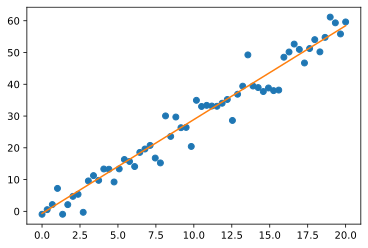

In [8]:
with tf.Session() as sesh:
    sesh.run(init)
    
    for epoch in range(epochs):
        for x, y in zip(train_x, train_y):
            sesh.run(optimizer, feed_dict={X: x, Y: y})
        if not epoch % 20:
            c = sesh.run(cost, feed_dict={X: train_x, Y: train_y})
            w = sesh.run(W)
            b = sesh.run(B)
            print(f'epoch: {epoch:04d} c={c:.4f} w={w:.4f} b={b:.4f}')
    
    weight = sesh.run(W)
    bias = sesh.run(B)
    plt.plot(train_x, train_y, 'o')
    plt.plot(train_x, weight * train_x + bias)
    plt.show()